In [34]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import json
from tqdm.notebook import tqdm

from utils import grainPreprocess, grainShow, grainMark, grainDraw, grainApprox, grainStats, grainMorphology,grainGenerate

from scipy import stats

In [2]:
# json_data.append({'path': paths[i],
#                   'name': name,
#                   'type': types_dict[name],
#                   'legend': [text],
#                   'density_curve_scatter': [x,y],
#                   'gauss_approx_plot': [x_gauss, y_gauss],
#                   'gauss_approx_data': [{'mus': mus, 'sigmas':sigmas, 'amps':amps}],
#                   'angles_series': all_unique_angels,
#                   })

In [49]:
def angles_approx(data, save_name, step, N, M,  save=False,indices=None, font_size=20,scatter_size=20):
    #
    # вывод распределения углов для всех фотографий одного образца
    #

    alloys_indices=range(len(data))

    if indices is not None:
        alloys_indices=indices

    plt.rcParams['font.size'] = '15'
    plt.figure(figsize=(N, M))

    # маркеры для одновременного вывода скаттера для разных классов
    # количество варкеров=количество классов-1
    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors = ['orange', 'red','blue','green', 'indigo']

    legend=[]
    for i in alloys_indices:
        legend.append(data[i]['name']+' '+data[i]['type'])

    for i in alloys_indices:
        plt.plot(data[i]['gauss_approx_plot'][0], 
                 data[i]['gauss_approx_plot'][1],
                 color=colors[i])

    for i in alloys_indices:
        marker = markers[i]
        plt.scatter(data[i]['density_curve_scatter'][0],data[i]['density_curve_scatter'][1],  marker=marker,color=colors[i],s=scatter_size)

    plt.ylabel('p(x)', fontsize=font_size)
    plt.xlabel('углы, градусы', fontsize=font_size)

    x = [0,60,120,180,240,300,360]
    plt.xticks(x, x)
        
    plt.title(save_name)

    if save:
        plt.savefig(f'распределение_углов_{save_name}_шаг_{step}.png')

    for i in alloys_indices:
        print(data[i]['legend'])
    
    plt.legend(legend)
    plt.show()

In [52]:
step=5
# file_name='bc_left_(1536,1536,1)_preprocess'
# file_name='o_bc_left_4x_768_360_768_median_generated_preprocess'
# file_name='o_bc_left_4x_768_360_512_median_generated_preprocess'
# file_name='o_bc_left_4x_768_360_256_median_generated_preprocess'
# file_name='data/angles/bc_left_(1536,1536,1)_preprocess'
# file_name='o_bc_left_4x_768_360_512_median_generated_preprocess'
file_name='test'

data = open(f'{file_name}_step_{step}_angles.json',encoding='utf-8')
data = json.load(data)

--------------
средние зерна средние зерна
 количество углов 5422
 количество снимков 10
 шаг угла 5 градусов
 mu1 = 111.72 sigma1 = 28.37 amp1 = 4.4
 mu2 = 221.73 sigma2 = 17.87 amp2 = 0.59
--------------
мелкие зерна мелкие зерна
 количество углов 14155
 количество снимков 10
 шаг угла 5 градусов
 mu1 = 108.43 sigma1 = 28.71 amp1 = 4.19
 mu2 = 238.26 sigma2 = 24.62 amp2 = 0.79
--------------
крупные зерна крупные зерна
 количество углов 2948
 количество снимков 10
 шаг угла 5 градусов
 mu1 = 114.55 sigma1 = 30.46 amp1 = 4.07
 mu2 = 223.5 sigma2 = 22.44 amp2 = 0.91


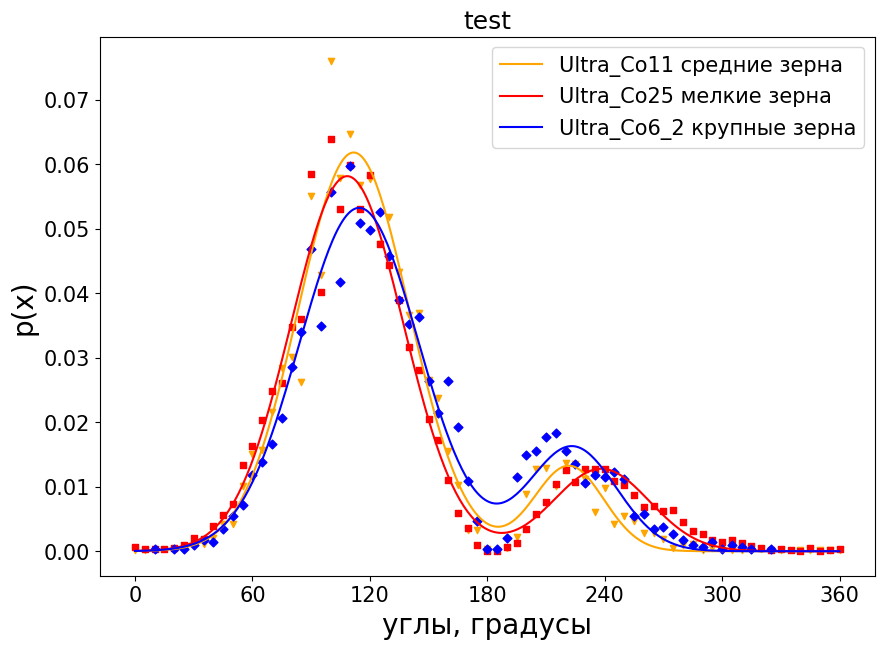

In [53]:
N = 10
M = 7

# save = True
save = False
save_name=file_name
# indices=[3,0,1,4, 2]
# indices=[3,0, 2]
indices=[0,1,2]
# indices=None

angles_approx(data,save_name, step, N, M, indices=indices,save=save)

In [31]:
def angles_approx_2(data_1, data_2, save_name, step, N, M, save=False, font_size=20,scatter_size=20):
    #
    # вывод распределения углов для всех фотографий одного образца
    #

    alloys_indices=range(len(data_1))

    if indices is not None:
        alloys_indices=indices

    plt.rcParams['font.size'] = '15'
    
    fig, axes = plt.subplots(1,3,figsize=(N, M))

    markers = ['v', 's', 'D', 'd', 'p', '*','P']
    colors_1 = ['orange', 'red','blue','green', 'indigo', 'brown']
    colors_2 = ['olive', 'purple','cyan','pink', 'blue', 'lime']

    legends=[]
    for j,i in enumerate(alloys_indices):
        legends.append([])
        
        y_original=np.array(data_1['data'][i]['density_curve_scatter'][1])
        y_fake=np.array(data_2['data'][i]['density_curve_scatter'][1])
        w_dist = stats.wasserstein_distance(y_fake, y_original)
        
        y_gauss_original=np.array(data_1['data'][i]['gauss_approx_plot'][1])
        y_gauss_fake=np.array(data_2['data'][i]['gauss_approx_plot'][1])
        w_gauss_dist = stats.wasserstein_distance(y_gauss_original, y_gauss_fake)
        
        # tv_dist = np.sum(np.abs(y_original-y_fake))
        tv_dist=0
        
        gauss_real=data_1['data'][i]['gauss_approx_data']
        gauss_fake=data_2['data'][i]['gauss_approx_data']
        
        mus_diff = np.abs(np.array(gauss_real['mus']) - np.array(gauss_fake['mus']))
        sigmas_diff = np.abs(np.array(gauss_real['sigmas']) - np.array(gauss_fake['sigmas']))
        
        metrics = '\ntv_dist={tv_dist:.3f}\nw_dist={w_dist:.5f}\nw_gauss_dist={w_gauss_dist:.5f}\nmus_diff={mus_diff[0]:.2f};{mus_diff[1]:.2f}\nsigmas_diff={sigmas_diff[0]:.2f};{sigmas_diff[1]:.2f}'
        metrics = ''
        
        legends[j].append(data_1['data'][i]['name']+' '+data_1['data'][i]['type']+ f' real')
        legends[j].append(data_2['data'][i]['name']+' '+data_2['data'][i]['type']+ f' fake' + metrics)

    for j,i in enumerate(alloys_indices):
        axes[j].plot(data_1['data'][i]['gauss_approx_plot'][0], 
                 data_1['data'][i]['gauss_approx_plot'][1],
                 color=colors_1[i])
    
    for j,i in enumerate(alloys_indices):
        axes[j].plot(data_2['data'][i]['gauss_approx_plot'][0], 
                 data_2['data'][i]['gauss_approx_plot'][1],
                 color=colors_2[i])

    for j,i in enumerate(alloys_indices):
        marker = markers[i]
        axes[j].scatter(data_1['data'][i]['density_curve_scatter'][0],data_1['data'][i]['density_curve_scatter'][1],  marker=marker,color=colors_1[i],s=scatter_size)

    for j,i in enumerate(alloys_indices):
        marker = markers[i]
        axes[j].scatter(data_2['data'][i]['density_curve_scatter'][0],data_2['data'][i]['density_curve_scatter'][1],  marker=marker,color=colors_2[i],s=scatter_size)

        axes[j].set_ylabel('p(x)', fontsize=font_size)
        axes[j].set_xlabel('углы, градусы', fontsize=font_size)

    x = [0,60,120,180,240,300,360]
    
    for j in range(len(axes)):
        axes[j].set_xticks(x, x)
        axes[j].legend(legends[j])
        axes[j].set_ylim(0,0.07)
        # axes[j].legend(legends[j],loc=(0.0,1.04))

    if save:
        plt.savefig(f'распределение_углов_{save_name}_шаг_{step}.png')

    # for i in alloys_indices:
    #     print(data_1['data'][i]['legend'])
    # print('-----')
    # for i in alloys_indices:
    #     print(data_2['data'][i]['legend'])
    
    fig.suptitle(save_name) 
    
    plt.show()

In [45]:
step=5
# file_name='bc_left_(1536,1536,1)_preprocess'
file_name_1='data/angles/bc_left_(1536,1536,1)_preprocess'

data_1 = open(f'{file_name_1}_step_{step}_angles.json',encoding='utf-8')
data_1 = json.load(data_1)

# file_name_2='data/angles/o_bc_left_4x_768_360_768_median_generated_preprocess'
# file_name='o_bc_left_4x_768_360_512_median_generated_preprocess'
file_name='data/angles/o_bc_left_4x_768_360_256_median_generated_preprocess'

data_2 = open(f'{file_name_2}_step_{step}_angles.json',encoding='utf-8')
data_2 = json.load(data_2)

In [33]:
len(data_1['data'])

5

In [ ]:
y_original=np.array(data_1['data'][0]['density_curve_scatter'][0])
y_fake=np.array(data_2['data'][0]['density_curve_scatter'][0])

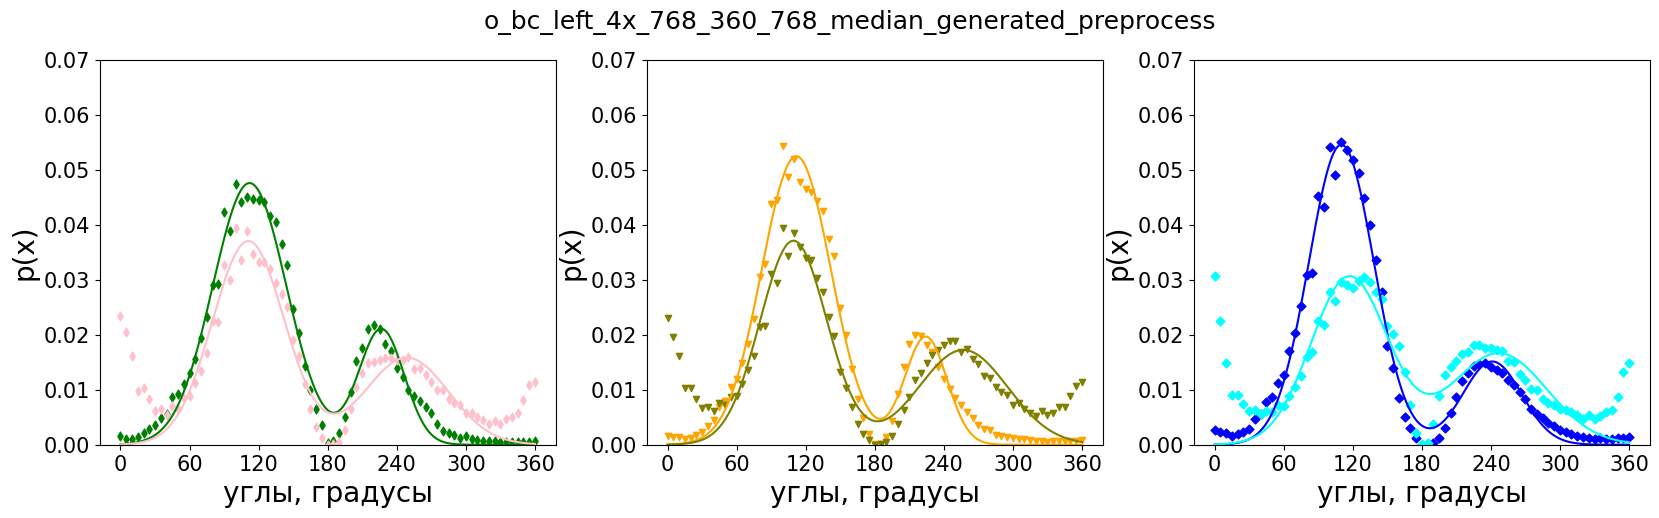

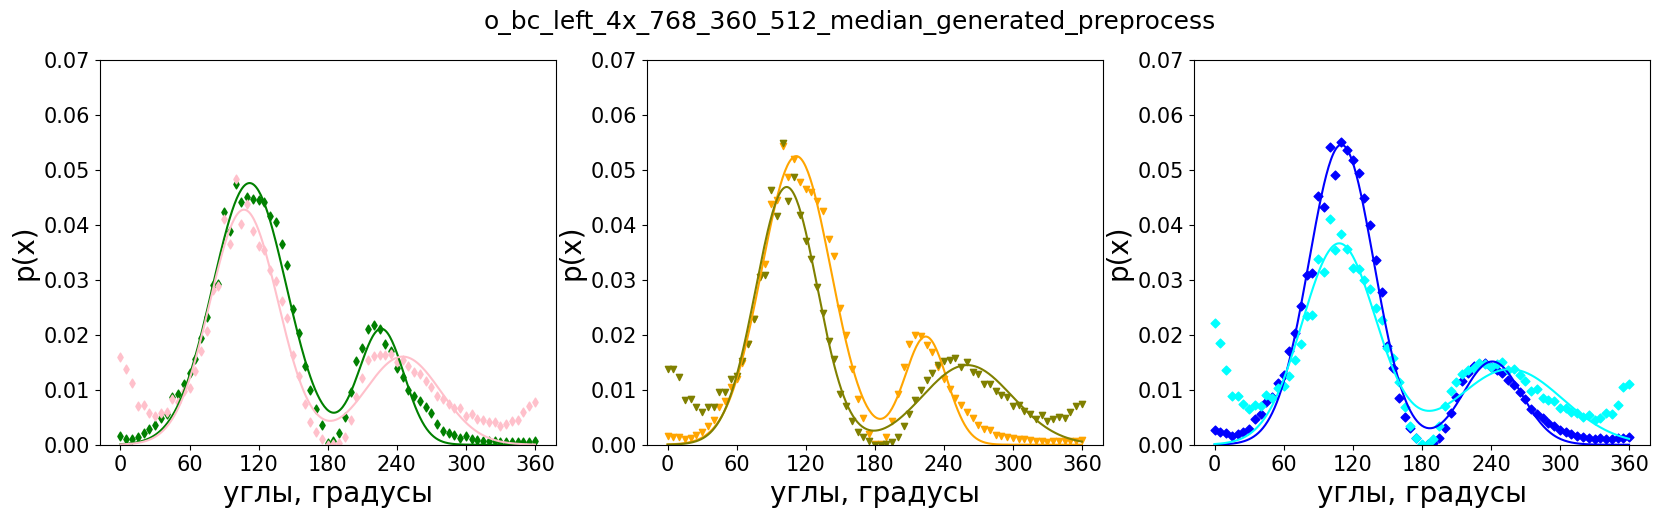

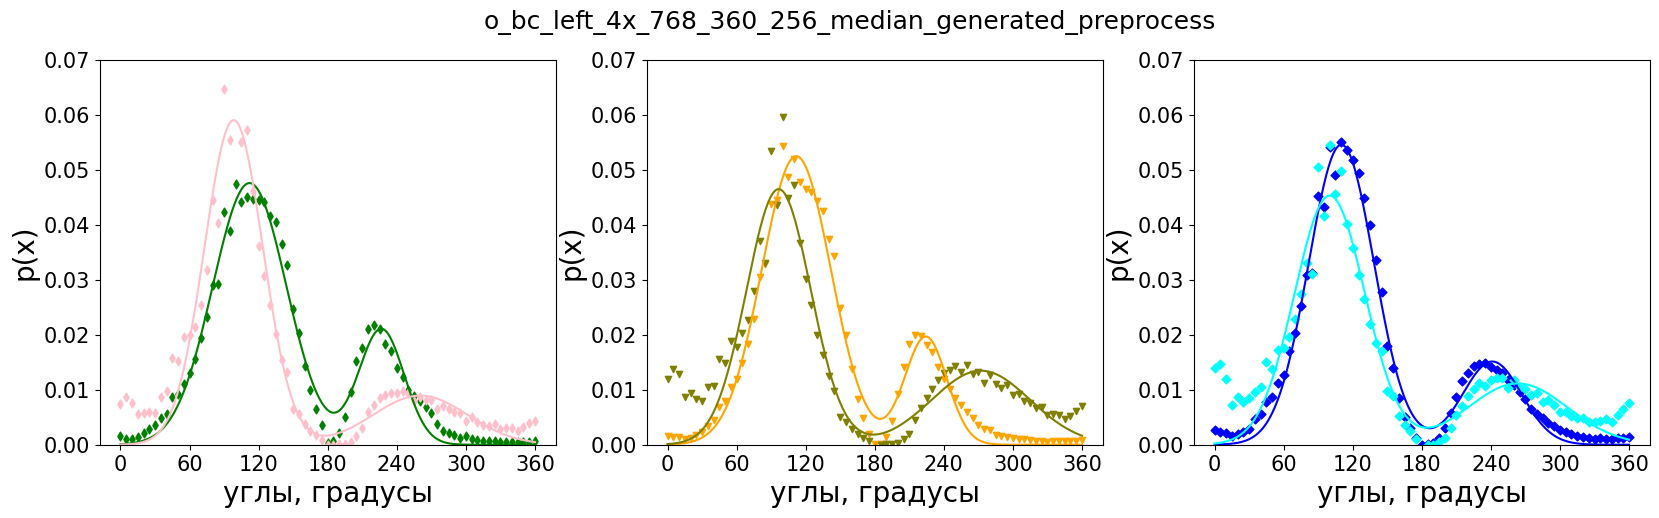

In [28]:
file_name_1='data/angles/bc_left_(1536,1536,1)_preprocess'

# file_name_2_1='data/angles/o_bc_left_4x_768_360_768_median_generated_preprocess'
# file_name_2_2='data/angles/o_bc_left_4x_768_360_512_median_generated_preprocess'
# file_name_2_3='data/angles/o_bc_left_4x_768_360_256_median_generated_preprocess'

file_name_2_1='o_bc_left_4x_768_360_768_median_generated_preprocess'
file_name_2_2='o_bc_left_4x_768_360_512_median_generated_preprocess'
file_name_2_3='o_bc_left_4x_768_360_256_median_generated_preprocess'

names = [file_name_2_1, file_name_2_2, file_name_2_3]

N = 20
M = 5

# save = True
save = False

data_1 = open(f'{file_name_1}_step_{step}_angles.json',encoding='utf-8')
data_1 = json.load(data_1)['data']

for file_name_2 in names:

    save_name=file_name_2.split('/')[-1]
    # indices=[3,0,1,4, 2]
    # indices=[3,0, 2]
    indices=[0, 1, 2]

    data_2 = open(f'{file_name_2}_step_{step}_angles.json',encoding='utf-8')
    data_2 = json.load(data_2)


    angles_approx_2(data_1,data_2,save_name, step, N, M, indices=indices,save=save)

In [ ]:
def angles_approx_modes(folder, step, start1, stop1, start2, stop2, width, height, font_size=25):
    #
    # аппроксимация каждой моды
    #
    xy_scatter_o = np.load(f'{folder}/xy_scatter_step_{step}.npy', allow_pickle=True)
    xy_gauss_o = np.load(f'{folder}/xy_gauss_step_{step}.npy', allow_pickle=True)
    texts = np.load(f'{folder}/texts_step_{step}.npy', allow_pickle=True)

    xy_scatter1 = []
    xy_scatter2 = []

    for j, sc in enumerate(xy_scatter_o):
        x = sc[0]
        y = sc[1]
        xy_scatter1.append([[], []])
        xy_scatter2.append([[], []])
        for i, xi in enumerate(x):
            if xi <= stop1 and xi >= start1:
                xy_scatter1[j][0].append(x[i])
                xy_scatter1[j][1].append(y[i])

            if xi <= stop2 and xi >= start2:
                xy_scatter2[j][0].append(x[i])
                xy_scatter2[j][1].append(y[i])

    plt.rcParams['font.size'] = '25'
    markers = ['v', 's', 'D', 'd', 'p', '*']
    k = 2
    for i in range(len(xy_scatter_o)):
        plt.figure(figsize=(width, height))
        marker = markers[i]

        #    plt.scatter(xy_scatter_o[i][0],xy_scatter_o[i][1])

        x1 = np.array(xy_scatter1[i][0])
        y1 = xy_scatter1[i][1]

        x2 = np.array(xy_scatter2[i][0])
        y2 = xy_scatter2[i][1]

        mu1, sigma1, amp1 = grainApprox.gaussian_fit(x1, y1, mu=120)
        mu2, sigma2, amp2 = grainApprox.gaussian_fit(x2, y2, mu=225)

        x_gauss1 = np.arange(mu1 - 3 * sigma1, mu1 + 3 * sigma1)
        x_gauss2 = np.arange(mu2 - 3 * sigma2, mu2 + 3 * sigma2)

        y_gauss1 = grainStats.gaussian(x_gauss1, mu1, sigma1, amp1)
        y_gauss2 = grainStats.gaussian(x_gauss2, mu2, sigma2, amp2)

        #    plt.plot(x_gauss,y_gauss)
        plt.scatter(x1, y1, marker=marker)
        plt.plot(x_gauss1, y_gauss1)

        plt.scatter(x2, y2, marker=markers[i + 1])
        plt.plot(x_gauss2, y_gauss2)

        #  print('mu1=',mu1,' sigma1=',sigma1,'amp1=',amp1)
        #  print('mu2=',mu2,' sigma2=',sigma2,'amp2=',amp2)
        plt.legend(['moda1', 'moda2', 'approx1', texts[i]], fontsize=14, loc=1)
        plt.ylabel('p(x)', fontsize=font_size)
        plt.xlabel('угол связующего вещества, градусы', fontsize=font_size)
        # plt.ylim([0,max(np.log(xy_scatter[i][1][:-1]))])
    # plt.savefig('крупные моды отдельная аппрокс  ' + names[i])

    #  print(texts)

    #  plt.savefig('распределение углов')
    plt.show()

In [ ]:
folder = 'saved np'
width = 12
height = 15

step = 1

start = 340
stop = 360

start1 = 50
stop1 = 180

start2 = 180
stop2 = 300

angles_approx_modes(folder, step, start1, stop1, start2, stop2, width, height)